<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_9/ML_WEEK10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍆 Praktikum 1

k-Nearest Neighbors (kNN)

## Langkah 1 - Load Data

In [34]:
# Load data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/irisBaru.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Langkah 2 - Eksplorasi Data

Cek struktur data informasi deskriptif data

In [35]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


## Langkah 3 - Visualisasi Data
Lakukan visualisasi data untuk mengetahui distribusi dan korelasi setiap fitur terhadap label.

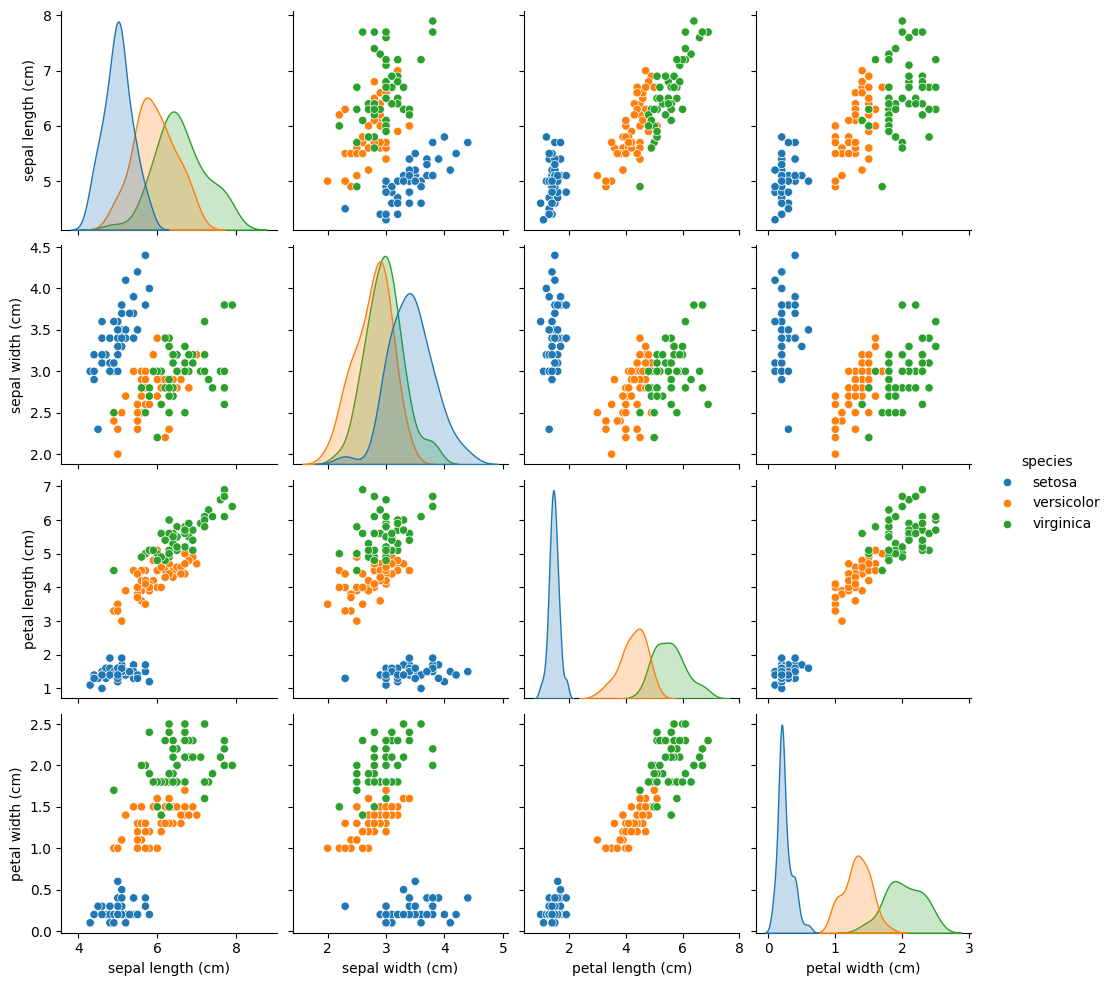

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

## Langkah 4 - Preprocessing
Pada tahap ini, kita akan memisahkan antara label dengan fitur yang akan digunakan. Selain itu, untuk alasan pembelajaran, kita akan melakukan standardisasi dari fitur yang akan digunakan.

Pada kasus Iris Dataset, seluruh fitur sudah dalam satuan yang sama yaitu cm.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Langkah 5 - Buat Model kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##Langkah 6 - Evaluasi Model kNN
Pada tahap ini kita akan melakukan evaluasi terhadap model kNN yang telah dibuat sebelumnya. Metrik utama yang akan digunakan adalah akurasi dan detail analisis menggunakan confusion metrics.

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Dapat dilihat bahwa model dapat bekerja dengan performa sempurna pada data testing. Namun apakah memang nilai
k
k adalah nilai yang terbaik? Selanjutnya kita akan mengevaluasi setiap nilai
k
k.

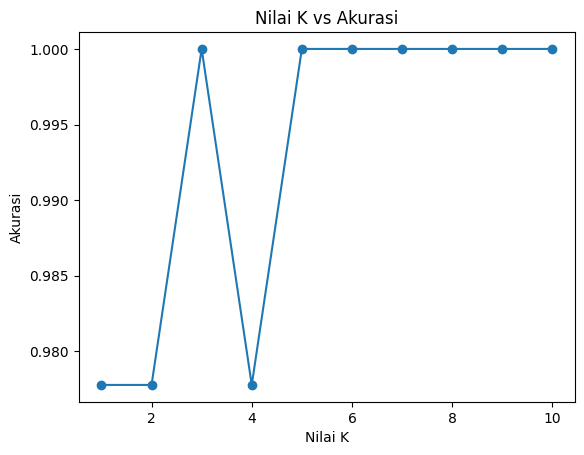

In [40]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


Dapat dilihat bahwa performa pada data testing mencapai nilai sempurna saat k = 3, dan tetap tinggi pada nilai k = 6 hingga k = 10. Meskipun demikian, perlu dicatat bahwa kNN tidak menyimpan bobot hasil training. Proses klasifikasi dilakukan secara langsung berdasarkan jumlah tetangga terdekat (lazy learning), sehingga hasil prediksi sangat bergantung pada struktur data dan nilai k yang dipilih.


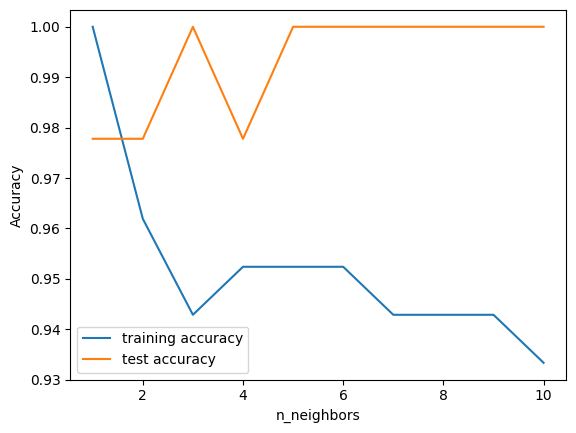

In [41]:
# Uji berbagai nilai n_neighbors (1–10)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Visualisasi hasil
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# 🥒 Praktikum 2
Klasifikasi Naive Bayes dengan Data Dummy

## Langkah 1 - Buat Dataset Dummy

In [42]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[ 78  24]
 [128  92]
 [114  37]
 [ 97  90]
 [ 96 100]
 [ 66 101]
 [ 52  92]
 [ 92 174]
 [ 56  99]
 [152  91]
 [111  28]
 [195 151]
 [231 143]
 [ 22 104]
 [204 143]
 [105 126]
 [153 135]
 [ 56 133]
 [ 39 105]
 [ 16 117]
 [129  46]
 [142 141]
 [189  48]
 [ 38  16]
 [110 100]
 [258 213]
 [  9  35]
 [162 125]
 [111  44]
 [ 13  15]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


## Langkah 2 (Opsional) - Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya.

In [43]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,78,24,0
1,128,92,0
2,114,37,0
3,97,90,0
4,96,100,0


## Langkah 3 (Opsional) - Labeling
 Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [44]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,78,24,Kelas B
1,128,92,Kelas B
2,114,37,Kelas B
3,97,90,Kelas B
4,96,100,Kelas B


## Langkah 4 - Visualisasi Data

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


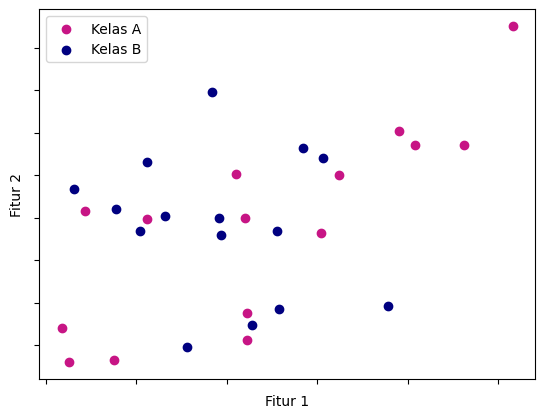

In [45]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Langkah 5 - Model Multinomial Naive Bayes
Selanjutnya buat model naive bayes dengan jenis multinomoial. Sejatinya, model multinomial digunakan untuk fitur yang bersifat diskrit (e.g. jumlah kata untuk klasifikasi teks). Akan tetapi kita akan mencoba menggunakan model ini untuk konteks data kontinu hanya sebagai pembelajaran.

In [46]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.7142857142857143
Hasil akurasi data test: 0.4444444444444444


## Langkah 6 - Model Gaussian Naive Bayes
Model Gaussian lebih cocok digunakan untuk data kontinu yang kita miliki, hal ini dikarenakan model ini menggunakan distribusi gaussian (normal) yang secara alami memiliki rentang dengan nilai kontinu.

In [47]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.4444444444444444


# 🥕 Praktikum 3
Klasifikasi Naive Bayes dengan Data Multimodal

## Langkah 1 - Load Data
Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan.

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df = df.rename(columns={'v1': 'Labels', 'v2': 'SMS'})

df.head()



,Labels,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms.

## Langkah 2 - Preprocessing
Beberapa hal yang akan dilakukan pada tahap ini yaitu,

1. Drop kolom yang tidak digunakan

2. Ubah nama kolom v1 (label) dan v2 (teks sms)

3. Inspeksi Data

4. Encode label

5. Memisahkan fitur dengan label

### Langkah 2a - Drop Kolom

In [49]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Langkah 2b - Inspeksi Data

In [50]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Langkah 2c - Encoding Label

In [51]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Langkah 2d - Pisahkan Fitur dengan Label

In [52]:
X = df['SMS'].values
y = df['Labels'].values

## Langkah 3 - Ekstraksi Fitur
Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

Cek fitur dari proses CountVectorizer.

In [54]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Langkah 4 - Training dan Evaluasi Model
Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# 🥚 Tugas 1
1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?<br>
jawab: untuk pemilihan fitur terbaik digunakan F-Annova test dan menghasilkan pilihan fitur terbaik berikut:<br>
  ['meanfreq', 'sd', 'median', 'q25', 'iqr', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.<br>
jawab: Berdasarkan fitur terbaik hasil dari seleksi menggunakan F-Anova test, model KNN yang telah dibuat menghasilkan akurasi sebesar 0.9810725552050473.

    Dari grafik terlihat bahwa akurasi pada data training dan testing hampir seimbang, menunjukkan bahwa model tidak overfitting dan memiliki generalisasi yang baik. Artinya, kombinasi fitur terpilih mampu memberikan performa prediksi yang optimal pada dataset voice.

    Selain itu, pemilihan fitur yang tepat dapat membantu model fokus pada fitur yang paling berpengaruh terhadap klasifikasi suara, mengurangi noise dan redundansi data, serta meningkatkan efisiensi komputasi. Hal ini menjadikan model lebih stabil dan akurat dibandingkan saat menggunakan semua fitur secara keseluruhan.

## Langkah 1: Load Data dan Eksplorasi Data


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
voice = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/voice.csv')

# Standarisasi nama kolom: lowercase dan hapus spasi
voice.columns = voice.columns.str.lower().str.replace(' ', '_')

voice.info()
print()
print(voice.describe())
print()
print("Distribusi label:")
print(voice['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   q25       3168 non-null   float64
 4   q75       3168 non-null   float64
 5   iqr       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Langkah 2: Visualisasi Data

Kita visualisasikan beberapa fitur yang relevan agar memahami perbedaan antara suara pria dan wanita.

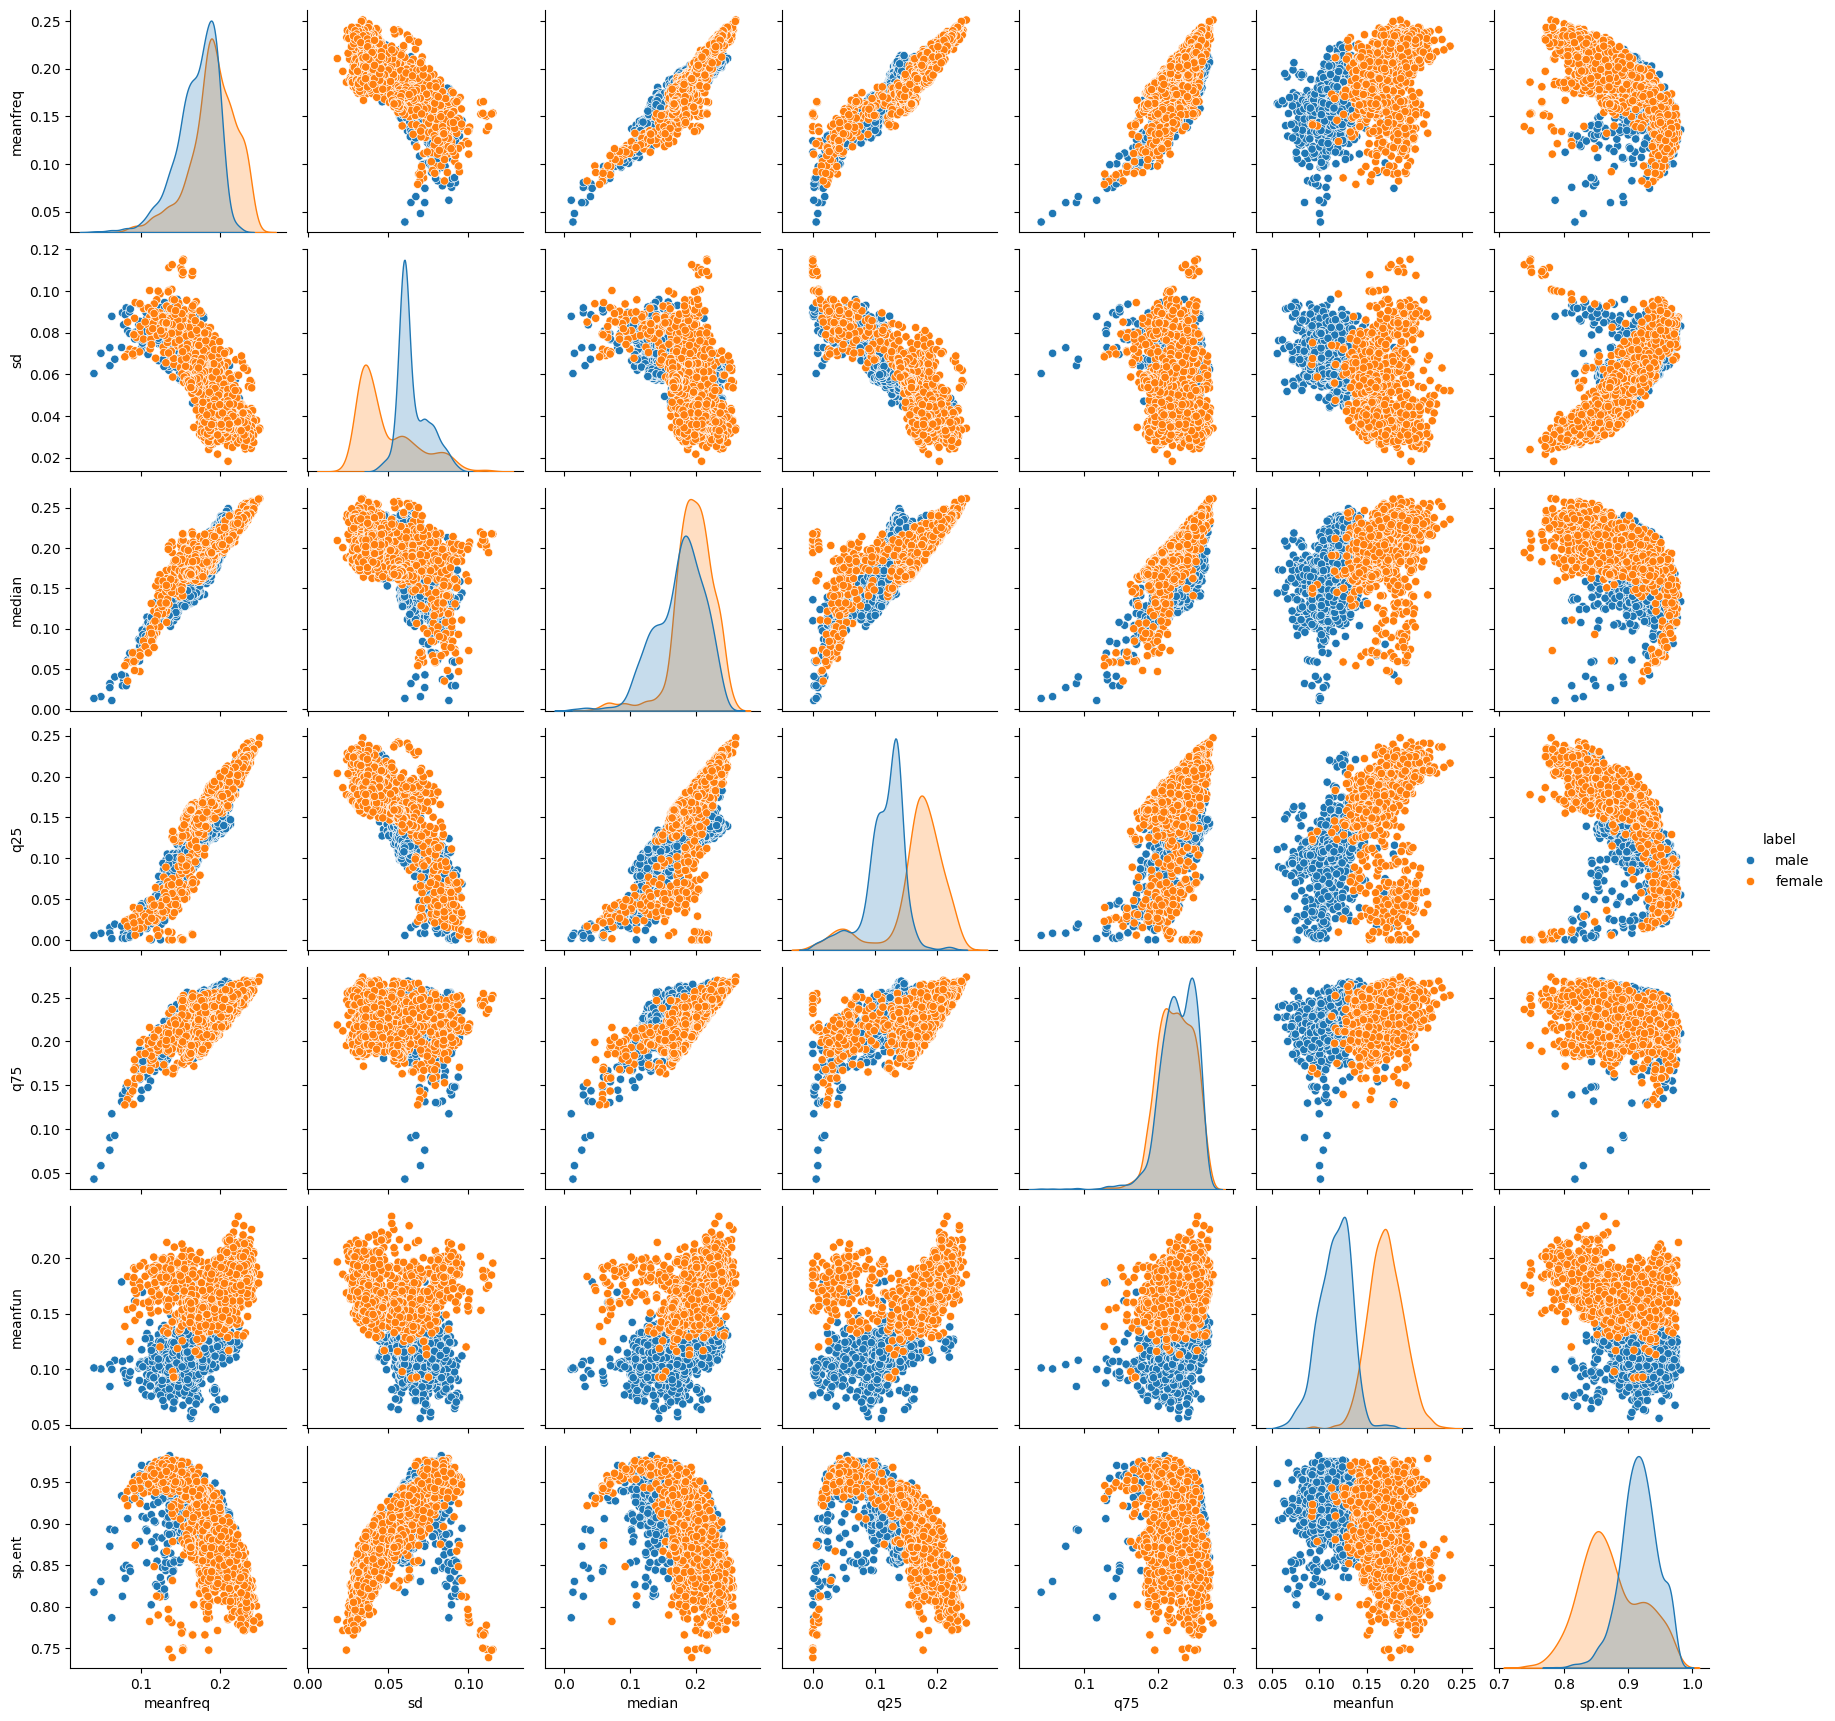

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi hubungan antar fitur utama
sns.pairplot(voice[['meanfreq', 'sd', 'median', 'q25', 'q75', 'meanfun', 'sp.ent', 'label']], hue='label')
plt.show()

## Langkah 3: Preprocessing

Pisahkan antara fitur (X) dan label (y) serta lakukan standarisasi.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode label (male = 0, female = 1)
voice['label'] = voice['label'].map({'male': 0, 'female': 1})

X = voice.iloc[:, :-1]   # semua kolom kecuali label
y = voice.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Langkah 4: Buat Model kNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K awal (misal=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## Langkah 5: Evaluasi Model kNN

Evaluasi akurasi, confusion matrix, dan laporan klasifikasi.

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9758149316508938

Confusion Matrix:
 [[467   9]
 [ 14 461]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       476
           1       0.98      0.97      0.98       475

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



## Langkah 6: Mencari Nilai k Optimal

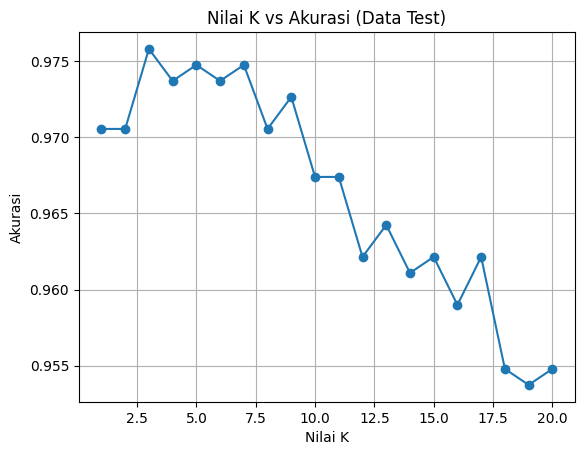

Nilai k terbaik: 3
Akurasi tertinggi: 0.9758


In [61]:
acc = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 21), acc, marker='o')
plt.title('Nilai K vs Akurasi (Data Test)')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k = acc.index(max(acc)) + 1
print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi tertinggi: {max(acc):.4f}")


## Langkah 7: Perbandingan Akurasi Training vs Testing

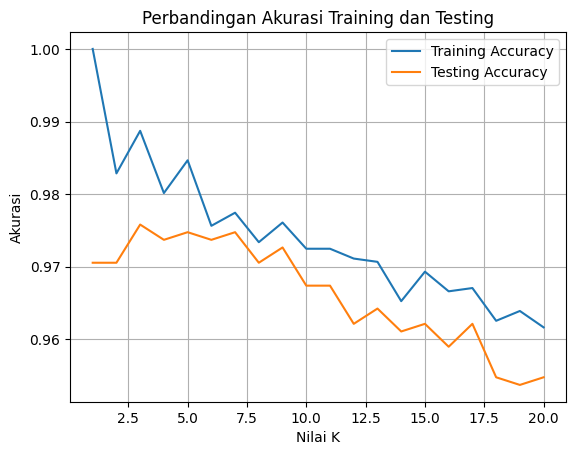

In [62]:
training_acc = []
testing_acc = []
neighbors = range(1, 21)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_acc.append(knn.score(X_train, y_train))
    testing_acc.append(knn.score(X_test, y_test))

plt.plot(neighbors, training_acc, label='Training Accuracy')
plt.plot(neighbors, testing_acc, label='Testing Accuracy')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Training dan Testing')
plt.legend()
plt.grid(True)
plt.show()


Dari grafik ini terlihat bahwa akurasi test (oranye) mencapai nilai tertinggi pada k = 3.
Meskipun akurasi training sedikit menurun dibanding k = 1, model pada k = 3 memberikan keseimbangan terbaik antara training dan test accuracy, sehingga k optimal adalah 3.

## Langkah 8: Seleksi Fitur Terbaik

Gunakan ANOVA F-test (SelectKBest) untuk menentukan fitur yang paling berpengaruh terhadap label.

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Fitur terbaik berdasarkan ANOVA F-value:")
print(selected_features.tolist())

Fitur terbaik berdasarkan ANOVA F-value:
['meanfreq', 'sd', 'median', 'q25', 'iqr', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']


## Langkah 9: Model Akhir dengan Fitur Terbaik

Gunakan fitur hasil seleksi dan nilai k terbaik.

In [64]:
# Split ulang dengan fitur terpilih
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gunakan k terbaik
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred = knn_final.predict(X_test)

print("\nAkurasi akhir dengan fitur terbaik:", accuracy_score(y_test, y_pred))



Akurasi akhir dengan fitur terbaik: 0.9810725552050473


## Langkah 10: Visualisasi Akhir Akurasi

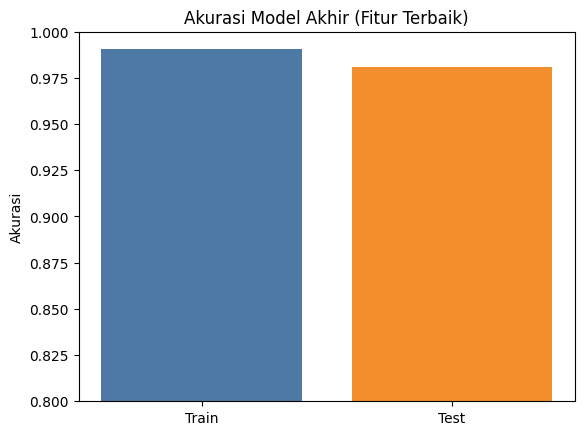

In [65]:
plt.bar(['Train', 'Test'], [knn_final.score(X_train, y_train), knn_final.score(X_test, y_test)],
        color=['#4e79a7','#f28e2b'])
plt.ylabel("Akurasi")
plt.title("Akurasi Model Akhir (Fitur Terbaik)")
plt.ylim(0.8, 1)
plt.show()


# 🥚 Tugas 2



## Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,



### 1. Menggunakan data spam.csv

In [66]:
# Import library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
spam = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/spam.csv', encoding='latin-1')

# Hapus kolom yang tidak digunakan
spam = spam.drop(spam.iloc[:, 2:], axis=1)

# Ganti nama kolom agar mudah dipahami
spam.columns = ['Label', 'SMS']

# Tampilkan beberapa baris pertama
print(spam.head())

  Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### 2. Preprocessing Data

In [67]:
# Encode label: spam = 1, ham = 0
spam['Label'] = spam['Label'].map({'spam': 1, 'ham': 0})

# Pisahkan fitur (X) dan label (y)
X = spam['SMS'].values
y = spam['Label'].values

### 3. Split Data (Training & Testing)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4. Ekstraksi Fitur (CountVectorizer dengan Stop Words)

In [69]:
# Inisialisasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit dan transform data training
X_train_vec = vectorizer.fit_transform(X_train)

# Transform data testing (tanpa fit untuk menghindari data leakage)
X_test_vec = vectorizer.transform(X_test)

# Cek jumlah fitur
print(f"Jumlah fitur: {len(vectorizer.get_feature_names_out())}")


Jumlah fitur: 7472


### 5. Training Model Multinomial Naive Bayes

In [70]:
# Inisialisasi model
model = MultinomialNB()

# Latih model dengan data training
model.fit(X_train_vec, y_train)

MultinomialNB()

### 6. Prediksi & Evaluasi Model

In [71]:
# Prediksi data training dan testing
y_pred_train = model.predict(X_train_vec)
y_pred_test = model.predict(X_test_vec)

# Hitung akurasi
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Cetak hasil evaluasi
print("HASIL EVALUASI MODEL")
print(f"Akurasi Data Train: {acc_train:.4f}")
print(f"Akurasi Data Test : {acc_test:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Ham', 'Spam']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

HASIL EVALUASI MODEL
Akurasi Data Train: 0.9946
Akurasi Data Test : 0.9839

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[959   6]
 [ 12 138]]


## Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

###   2. Fitur TF-IDF dengan mengaktifkan stop_words


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer dengan stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transform data training
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform data testing (tanpa fit)
X_test_tfidf = tfidf.transform(X_test)

print(f"Jumlah fitur TF-IDF: {len(tfidf.get_feature_names_out())}")

Jumlah fitur TF-IDF: 7472


#### Training Model

In [73]:
# Inisialisasi model
model_tfidf = MultinomialNB()

# Training
model_tfidf.fit(X_train_tfidf, y_train)


MultinomialNB()

#### Evaluasi Model TF-IDF

In [74]:
# Prediksi data training & testing
y_pred_train_tfidf = model_tfidf.predict(X_train_tfidf)
y_pred_test_tfidf = model_tfidf.predict(X_test_tfidf)

# Hitung akurasi
acc_train_tfidf = accuracy_score(y_train, y_pred_train_tfidf)
acc_test_tfidf = accuracy_score(y_test, y_pred_test_tfidf)

print("HASIL EVALUASI MODEL (TF-IDF)")
print(f"Akurasi Data Train: {acc_train_tfidf:.4f}")
print(f"Akurasi Data Test : {acc_test_tfidf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_tfidf, target_names=['Ham', 'Spam']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_tfidf))


HASIL EVALUASI MODEL (TF-IDF)
Akurasi Data Train: 0.9838
Akurasi Data Test : 0.9668

Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
[[965   0]
 [ 37 113]]


###   3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

In [75]:
from tabulate import tabulate

# Data perbandingan
comparison = [
    ["CountVectorizer", acc_test],
    ["TF-IDF", acc_test_tfidf]
]

# Format tabel
headers = ["Metode", "Akurasi"]
print("\n PERBANDINGAN ANTARA COUNT VECTORIZER DENGAN TFIDF")
print()
print(tabulate(comparison, headers=headers, floatfmt=".4f", tablefmt="grid"))


 PERBANDINGAN ANTARA COUNT VECTORIZER DENGAN TFIDF

+-----------------+-----------+
| Metode          |   Akurasi |
+=================+===========+
| CountVectorizer |    0.9839 |
+-----------------+-----------+
| TF-IDF          |    0.9668 |
+-----------------+-----------+


Dari hasil diatas, dapat dilihat bahwa model dengan CountVectorizer menghasilkan akurasi lebih tinggi (98.39%) dibandingkan model TF-IDF (96.68%). Hal ini karena kemungkinan pada dataset SPAM pola kata dalam pesan spam cenderung repetitif dan dapat dideteksi dengan lebih baik melalui frekuensi kemunculan kata, bukan bobot seperti pada TF-IDF.

### 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

jawab: Berdasarkan hasil evaluasi, metode **CountVectorizer** menunjukkan performa terbaik dalam klasifikasi pesan spam dibandingkan dengan **TF-IDF**, baik dari segi akurasi maupun relevansi fitur yang dipilih.

| Metode           | Jumlah Fitur Awal |
|------------------|-------------------|
| CountVectorizer  | 7472              |
| TF-IDF           | 7472              |

#### 20 Fitur Terpilih
**CountVectorizer**: ['00', '000', '02', '03', '04', '06', '0800', '08000839402', '08000930705', '0870', '08707509020', '08712300220', '08712460324', '08718720201', '10', '100', '1000', '10p', '11', '11mths']

**TF-IDF**: ['00', '000', '02', '03', '04', '06', '0800', '08000839402', '08000930705', '08001950382', '08002986906', '0870', '08702840625', '08707509020', '08712300220', '08712460324', '08718720201', '09050090044', '10', '100']

Fitur diatas terpilih sebagai fitur terbaik dalam anova test karena dalam feature selection ANOVA menghitung nilai F-statistic untuk setiap fitur. Fitur dengan variasi nilai yang besar antar kelas (misalnya kata yang jauh lebih sering muncul di spam dibanding di ham) akan mendapat skor F yang tinggi. Dengan kata lain, fitur terbaik itu sering muncul dalam dataset.

#### Perbandingan Akurasi
| Metode          | Akurasi  |
|-----------------|----------|
| CountVectorizer | 0.9507   |
| TF-IDF          | 0.8771   |

**Kesimpulan**:  
Metode terbaik untuk kasus klasifikasi spam pada dataset `spam.csv` adalah **CountVectorizer**, karena menghasilkan akurasi yang lebih tinggi dan fitur yang lebih relevan terhadap pola pesan spam.


### Load dan split data

In [85]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/spam.csv', encoding='latin-1')

# Hapus kolom tidak relevan
df = df.drop(df.iloc[:, 2:], axis=1)
df.columns = ['Label', 'SMS']

# Encode label: spam = 1, ham = 0
df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    df['SMS'], df['Label'], test_size=0.2, random_state=42
)

### Pemilihan Fitur (menggunakan anova test)

In [86]:
vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english'),
    "TF-IDF": TfidfVectorizer(stop_words='english')
}

results = {}

### Train ulang model menggunakan Fitur terpilih

In [95]:
for name, vectorizer in vectorizers.items():
    print(f"\nMetode: {name}")

    # Transformasi data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    print(f"Jumlah fitur awal: {X_train_vec.shape[1]}")

    # Seleksi fitur dengan ANOVA
    selector = SelectKBest(score_func=f_classif, k=k_best)
    X_train_sel = selector.fit_transform(X_train_vec, y_train)
    X_test_sel = selector.transform(X_test_vec)
    best_features = vectorizer.get_feature_names_out()[selector.get_support()]
    print("20 fitur terpilih:")
    print(best_features[:20])

    # Training dan evaluasi
    model = MultinomialNB()
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)

    # Simpan hasil
    results[name] = {
        "accuracy": acc,
        "features": best_features,
        "report": classification_report(y_test, y_pred, target_names=['Ham', 'Spam']),
        "confusion": confusion_matrix(y_test, y_pred)
    }

    # Tampilkan evaluasi
    print(f"Akurasi: {acc:.4f}")
    print("Classification Report:")
    print(results[name]["report"])


Metode: CountVectorizer
Jumlah fitur awal: 7472
20 fitur terpilih:
['00' '000' '02' '03' '04' '06' '0800' '08000839402' '08000930705' '0870'
 '08707509020' '08712300220' '08712460324' '08718720201' '10' '100' '1000'
 '10p' '11' '11mths']
Akurasi: 0.9507
Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


Metode: TF-IDF
Jumlah fitur awal: 7472
20 fitur terpilih:
['00' '000' '02' '03' '04' '06' '0800' '08000839402' '08000930705'
 '08001950382' '08002986906' '0870' '08702840625' '08707509020'
 '08712300220' '08712460324' '08718720201' '09050090044' '10' '100']
Akurasi: 0.8771
Classification Report:
              precision    recall  f1-score   support

         Ham       0.88      1.00      0.9

### Evaluasi dan Perbandingan kedua model

In [96]:
# Siapkan data akurasi
accuracy_table = [[name, result["accuracy"]] for name, result in results.items()]

# Tampilkan tabel
print("\nPerbandingan Akurasi")
print(tabulate(accuracy_table, headers=["Metode", "Akurasi"], floatfmt=".4f", tablefmt="grid"))

# Tentukan metode terbaik
best_method = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nMetode terbaik untuk dataset spam.csv adalah: {best_method}")


Perbandingan Akurasi
+-----------------+-----------+
| Metode          |   Akurasi |
+=================+===========+
| CountVectorizer |    0.9507 |
+-----------------+-----------+
| TF-IDF          |    0.8771 |
+-----------------+-----------+

Metode terbaik untuk dataset spam.csv adalah: CountVectorizer
